# Deep Learning A Z Mapa Autoorganizável - Vinhos

In [2]:
import minisom
import pandas as pd
import sklearn
import matplotlib
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [3]:
base = pd.read_csv('wines.csv')
base

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


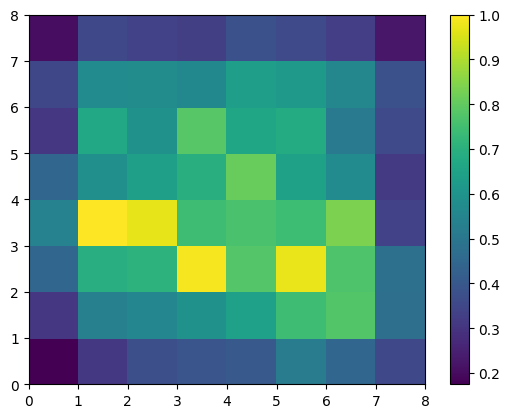

In [23]:
X = base.iloc[:, 1:14].values
y = base.iloc[:, 0].values
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration=810)
som._activation_map.shape
q = som.activation_response(X)
pcolor(som.distance_map().T)
colorbar(); # MID - mean inter neuron distance
w = som.winner(X[2])

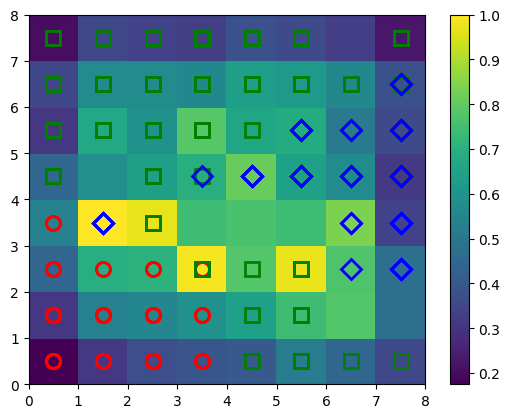

In [24]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

for i, x in enumerate(X):
  #print(i)
  #print(x)
  w = som.winner(x)
  #print(w)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i] - 1], markerfacecolor='None', # 0 é linha, 1 é coluna
       markeredgecolor=color[y[i]-1], markeredgewidth=2, markersize=10)

In [9]:
for i, x in enumerate(X):
    print(i)
    print(X)
    w = som.winner(x)
    print(x)

0
[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]
[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
 0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
 0.56134094]
1
[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 